# Performance Frameworks

## Motivation

### Not all algorithms are created equal

<img src="https://preview.redd.it/bp6g76i3iyx41.jpg?width=640&crop=smart&auto=webp&s=781fd5c86c65d74554a3eba6acd1051befa67630" width=400 />

### Questions: How do you develop performant programs in the least amount of time?

- Reduce development Time
- Improve performance Time

## Overview

1. Graph Databases & PyTorch (Simon)
2. Slurm  (Giovanni)
3. Snakemake (Giovanni)
4. Numba  (Robin)
5. Dask  (Robin)

# Tensorflow / PyTorch

# Network Architectures

# Slurm

## Managing Jobs

Continuous monitoring of Slurm jobs (automatically updates every 2 sec):
```bash
watch squeue -u rccg
```

## Submitting Jobs

### General Intro

### Snake

# A brief note on performance in Python

## Not all algorithms are created equal

<img src="https://preview.redd.it/bp6g76i3iyx41.jpg?width=640&crop=smart&auto=webp&s=781fd5c86c65d74554a3eba6acd1051befa67630" width=400 />

## Questions: How do you develop performant programs in the least amount of time?

- Reduce development Time
- Improve performance Time

We all have heard it:
- Python is *too slow!*
- Python cannot replace Fortran or C

## Performance differences within Python

### Slow Python

Writing code as if it was C

- Loops
- Accessing Data
- Appending Data

#### Why are these slow?

Loops

- Python interpreter goes line-by-line
- Therefore, no loop unrolling
- With GIL execution of each iteration sequential

Accessing Data

- Lists, Dictionaries, etc. allow for mixed types
- This means, they structures of pointers rather than the data itself
- The data might not be contiguous in memory
- This leads to memory jumping and cache misses

Appending Data

- Dictionaries, etc. are initialized with a fixed size
- If new data gets appended, this might cause an implicit copy

## Introduction to Asymptotic Analysis

### Big O Notation

Big O - or $\mathcal{O}(n)$ - refers to the <span style="text-decoration: underline">*worst-case scaling*</span> with size $n$.

All coefficients or smaller components are not to be included

<img src="https://miro.medium.com/max/1830/1*5ZLci3SuR0zM_QlZOADv8Q.jpeg" width=640 />

https://www.bigocheatsheet.com/

$$ \mathcal{O}(N) + \mathcal{O}(\log N)  =  \mathcal{O}(N + \log N)  =  \mathcal{O}(N) $$

### Big Theta Notation

Big $\Theta$ - or $\mathcal{\Theta}(n)$ - refers to the <span style="text-decoration: underline">*average-case scaling*</span> with size $n$.

### Omega Notation

Big $\Omega$ - or $\mathcal{\Omega}(n)$ - refers to the <span style="text-decoration: underline">*best-case scaling*</span> with size $n$.

### Notes

Obviously, these are simplified.

For a deep dive into asymptotic analysis see: https://cathyatseneca.gitbooks.io/data-structures-and-algorithms/content/analysis/notations.html

(it is also a great course on data structures and algorithms!)

## Intrinsic Object Types

### Python Object Complexity

https://wiki.python.org/moin/TimeComplexity

https://www.ics.uci.edu/~pattis/ICS-33/lectures/complexitypython.txt

#### Lists

| Operation        | Example      | Best or Average Case | Worst Case | Note                       |
|------------------|--------------|--------------|----------------------|----------------------------|
| Copy             | `l.copy()`     | O(n)         | O(n)                 | Same as l[:] which is O(N) |
| Append           | `l.append(5)`  | O(1)         | O(1)                 | |
| Pop last         | `l.pop()`      | O(1)         | O(1)                 | same as l.pop(-1), popping at end |
| Pop intermediate | `l.pop(n-k)`   | O(k)         | O(k)                 | |
| Pop first        | `l.pop(0)`     | O(n)         | O(n)                 | |
| Insert           | `l[a:b] = ...` | O(n)         | O(n)                 | |
| Get Item         | `l[i]`         | O(1)         | O(1)                 | |
| Set Item         | `l[i] = 0`     | O(1)         | O(1)                 | |
| Iteration        | `for v in l:`  | O(n)         | O(n)                 | |
| Get Slice (k=b-a)| `l[a:b]`       | O(k)         | O(k)                 | `l[1:5]:O(l)/l[:]:O(len(l)-0)=O(N)` |
| Del Slice (k=b-a)|              | O(n)         | O(n)                 | |
| Delete Item      | `del l[i]`/`l.remove(a)` | O(n)         | O(n)                 | |
| Set Slice        |              | O(k+n)       | O(k+n)               | |
| Extend (by k)    | `l.extend(k)`  | O(len(k))    | O(len(k))            | depends only on len of extension |
| Sort             | `l.sort()`     | O(n log n)   | O(n log n)           | key/reverse doesn't change this |
| Multiply         | `k*l`        | O(nk)        | O(nk)                | `5*l is O(N): len(l)*l is O(N**2)` |
| min(s), max(s)   | `min(l)/max(l)| O(n)         | O(n)                 | |
| Get Length       | `len(l)`       | O(1)         | O(1)                 | |
| Reverse          | `l.reverse()  | O(n)         | O(n)                 | |
| Containment      | x `in`/`not in` l |         | O(n)                 | searches list |
| Clear            | `l.clear()`    | O(1)         | similar to l = []    | Deferred garbage collection |
| Construction     | `list(...)`    | O(n)         | O(n)                 | depends on length of argument
| check `==`, `!=` | `l1 == l2`     | O(n)         |
| Remove           | `l.remove(...)`|              | On)     | 

#### Sets

| Operation                           | Example      | Best or Average case          | Worst Case         | notes                                      |
|-------------------------------------|--------------|-----------------------|--------------------|--------------------------------------------|
| Containment                         | x in s       | O(1)                  | O(n)               | compare to list/tuple - O(n)               |
| Length                              | len(s)       | O(1)                  | O(1)               |                                            |
| Add                                 | s.add(a)     | O(1)                  | O(1)               |
| Remove                              | s.remove(a)  | O(1)                  | O(1)               | compare to list/tuple - O(N)
| Discard                             | s.discard(a) | O(1)                  | O(1)               | 
| Pop                                 | s.pop()      | O(1)                  | O(1)               | compare to list - O(N)
| Clear                               | s.clear()    | O(1)                  | O(1)               | similar to s = set()
| Construction                        | set(n)       | O(n)                  | O(n)               |
| check ==, !=                        | s != t       | O(min(len(s),lent(t)) | O(n)               |
| <=/<                                | s <= t       | O(len(s1))            | O(n)               | issubset 
| >=/>                                | s >= t       | O(len(s2))            | O(n)               | issuperset s <= t == t >= s
| Union                               | `s | t`      | O(len(s)+len(t))      | O(len(s)+len(t))   |                                            |
| Intersection                        | `s & t`      | O(min(len(s), lent(t))| O(len(s) * len(t)) | replace "min" with "max" if t is not a set |
| Multiple intersection               | `s1&s2&..&sn`|                       | `(n-1)*O(l)`       | l is max(len(s1),..,len(sn))               |
| Difference                          | s - t        |                       | O(len(t))          |                    |                                            |
| Symmetric Diff                      | s ^ t        | O(len(s))             | O(len(s) * len(t)) |   
| Iteration                           | for v in s:  | O(N)                  |
| Copy                                | s.copy()     | O(N)                  |

#### Dicts

| Operation    | Example                | Average Case | Amortized Worst Case |	 
| -------------|------------------------|--------------|----------------------| 
| Copy         | `d.copy()`             | O(n)         | O(n)                 |
| Get Item     | `d[k]`                 | O(1)         | O(n)                 |
| Set Item     | `d[k]=v`               | O(1)         | O(n)                 |
| Delete Item  | `del d[k]`             | O(1)         | O(n)                 |
| Iteration    | `for k,v in d.items()` | O(n)         | O(n)                 |


# Numba

- just-in-time (JIT) compiler for Python
- works with: NumPy arrays, functions, and loops
- used with simple decorators
- with these "all or part of your code can \[...\] run at native machine code speed!"

```bash
conda install numba
```

```bash
pip install numba
```

## Just-in-Time Compilation

### The @jit decorator

In [1]:
def go_slow(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

In [2]:
from numba import jit
import numpy as np

In [3]:
@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

In [4]:
N = 100
grid_size = (N, N)

In [5]:
def setup(grid_size):
    return np.random.rand(np.prod(grid_size)).reshape(grid_size)

In [6]:
x = setup(grid_size)
_ = go_fast(x)

In [7]:
%%timeit x = setup(grid_size)
_ = go_slow(x)

302 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%%timeit x = setup(grid_size)
_ = go_fast(x)

8.92 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### How fast can it be?

- targets compilation to specific CPU
- "speed up varies depending on application"
- generally "can be one to two orders of magnitude" to C

## Ahead-of-Time Compilation (Eager Compilation)

Using signatures, declaring the function leads to compilation!

Format: `OutputType[shapes](InputType1[shapes1], InputType2[shapes2], ....)`

- `void` is the return type of functions returning nothing (which actually return None when called from Python)
- `intp` and `uintp` are pointer-sized integers (signed and unsigned, respectively)
- `intc` and `uintc` are equivalent to C int and unsigned int integer types
- `int8`, `uint8`, `int16`, `uint16`, `int32`, `uint32`, `int64`, `uint64` are fixed-width integers of the corresponding bit width (signed and unsigned)
- `float32` and `float64` are single- and double-precision floating-point numbers, respectively
- `complex64` and `complex128` are single- and double-precision complex numbers, respectively
- array types can be specified by indexing any numeric type, e.g. `float32[:]` for a one-dimensional single-precision array or `int8[:,:]` for a two-dimensional array of 8-bit integers.

For up-to-date version see: https://numba.pydata.org/numba-doc/latest/user/jit.html#signature-specifications

### Example

In [9]:
import numba as nb

In [10]:
@jit(nb.float64[:,:](nb.float64[:, :]), nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

In [11]:
%%timeit x = setup(grid_size)
_ = go_fast(x)

13.4 µs ± 549 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## JIT kwargs

`nopython=True`
- uses only numba objects

`nogil=True`
- removes the Global Interpreter Lock (GIL) restrictions when only using Numba objects
- allows concurrent execution therefore advantage of multiple cores
- requires `nopython=True`

`cache=True`
- saves the compiled code for future use

`parallel=True`

- automatic parallelization
- requires `nopython=True`
- supported operations: https://numba.pydata.org/numba-doc/latest/user/parallel.html#numba-parallel

## Decorators provided:

- `@njit` - this is an alias for `@jit(nopython=True)` as it is so commonly used!
- `@vectorize` - produces NumPy ufunc s (with all the ufunc methods supported).
- `@guvectorize` - produces NumPy generalized ufunc s.
- `@stencil` - declare a function as a kernel for a stencil like operation.
- `@jitclass` - for jit aware classes.
- `@cfunc` - declare a function for use as a native call back (to be called from C/C++ etc).
- `@overload` - register your own implementation of a function for use in nopython mode, e.g. @overload(scipy.special.j0).

https://numba.pydata.org/numba-doc/latest/user/5minguide.html

Extra options available in some decorators:
- `parallel = True` - enable the automatic parallelization of the function.
- `fastmath = True` - enable fast-math behaviour for the function.

### Stencil

Using the 2D Finite Difference Kernel as an example

In [12]:
coeffs = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

We will use periodic boundary conditions

#### Using Stencil decorator

In [19]:
grid_size = (4096, 4096)

In [14]:
from numba import stencil

In [15]:
@stencil
def grad_stencil(arr):
    return arr[-1, 0] + arr[0, -1] + arr[0, 1] + arr[1, 0] - 4*arr[0, 0]

In [20]:
%%timeit a = setup(grid_size)
arr = grad_stencil(np.pad(a, 1, 'wrap'))[1:-1, 1:-1]

766 ms ± 64.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Comparing to Scipy

In [17]:
import scipy.signal

In [21]:
%%timeit a = setup(grid_size)
arr = scipy.signal.convolve2d(np.pad(a, 1, 'wrap'), coeffs)[2:-2, 2:-2]

1.5 s ± 73.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
a = setup(grid_size)
arr_nb = grad_stencil(np.pad(a, 1, 'wrap'))[1:-1, 1:-1]
arr_scipy = scipy.signal.convolve2d(np.pad(a, 1, 'wrap'), coeffs)[2:-2, 2:-2]
assert np.allclose(arr_nb, arr_scipy), f"Failed with max error: {np.max(np.abs(arr_nb - arr_scipy))}"

#### Speeding up Stencil

In [23]:
from numba import jit

In [24]:
@jit
def grad_stencil_wrapped(arr):
    """simply apply the stencil"""
    return grad_stencil(arr)

In [25]:
arr_nb = grad_stencil_wrapped(np.pad(a, 1, 'wrap'))[1:-1, 1:-1]
assert np.allclose(arr_nb, arr_scipy), f"Failed with max error: {np.max(np.abs(arr_nb - arr_scipy))}"

In [26]:
%%timeit a = setup(grid_size)
arr = grad_stencil_wrapped(np.pad(a, 1, 'wrap'))[1:-1, 1:-1]

167 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
@jit(nopython=True, nogil=True, parallel=True, fastmath=True)
def grad_stencil_wrapped_ops(arr):
    """simply apply the stencil"""
    return grad_stencil(arr)

In [30]:
arr_nb = grad_stencil_wrapped_ops(np.pad(a, 1, 'wrap'))[1:-1, 1:-1]
assert np.allclose(arr_nb, arr_scipy), f"Failed with max error: {np.max(np.abs(arr_nb - arr_scipy))}"

In [31]:
%%timeit a = setup(grid_size)
arr = grad_stencil_wrapped_ops(np.pad(a, 1, 'wrap'))[1:-1, 1:-1]

189 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Numpy vectorized

In [32]:
def grad_np(a):
    padded = np.pad(a, 1, 'wrap')
    arr_np = (
        padded[0:-2, 1:-1]  # above
        + padded[1:-1, 0:-2]  # left
        -4 * padded[1:-1, 1:-1]  # center
        + padded[1:-1, 2:]  # right
        + padded[2:, 1:-1]  # below
    )
    return arr_np

In [33]:
arr_np = grad_np(a)
assert np.allclose(arr_np, arr_scipy), f"Failed with max error: {np.max(np.abs(arr_np - arr_scipy))}"

In [34]:
%%timeit a = setup(grid_size)
grad_np(a)

506 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Numpy vectorized with Nuba

In [40]:
@jit(nopython=True, nogil=True, parallel=True)
def grad_np_numba(padded):
    return (
        padded[0:-2, 1:-1]  # above
        + padded[1:-1, 0:-2]  # left
        -4 * padded[1:-1, 1:-1]  # center
        + padded[1:-1, 2:]  # right
        + padded[2:, 1:-1]  # below
    )

In [41]:
arr_nb = grad_np_numba(np.pad(a, 1, 'wrap'))
assert np.allclose(arr_nb, arr_scipy), f"Failed with max error: {np.max(np.abs(arr_nb - arr_scipy))}"

In [42]:
%%timeit a = setup(grid_size)
arr = grad_np_numba(np.pad(a, 1, 'wrap'))

119 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Performance Plots!

Plot performance of various versions with scaling

Python module: [perfplot](https://github.com/nschloe/perfplot)
- `pip install perfplot`

In [43]:
import perfplot

In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

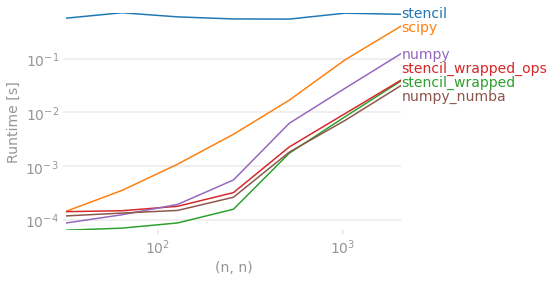

Wall time: 57.6 s


In [45]:
%%time
perfplot.show(
    setup=lambda n: setup((n, n)),  # or setup=numpy.random.rand
    kernels=[
        lambda a: grad_stencil(np.pad(a, 1, 'wrap'))[1:-1, 1:-1],
        lambda a: scipy.signal.convolve2d(np.pad(a, 1, 'wrap'), coeffs)[2:-2, 2:-2],
        lambda a: grad_stencil_wrapped(np.pad(a, 1, 'wrap'))[1:-1, 1:-1],
        lambda a: grad_stencil_wrapped_ops(np.pad(a, 1, 'wrap'))[1:-1, 1:-1],
        lambda a: grad_np(a),
        lambda a: grad_np_numba(np.pad(a, 1, 'wrap'))
    ],
    labels=["stencil", "scipy", "stencil_wrapped", "stencil_wrapped_ops", "numpy", "numpy_numba"],
    n_range=[2 ** k for k in range(5, 12)],
    xlabel="(n, n)",
    # More optional arguments with their default values:
    # title=None,
    logx="auto",  # set to True or False to force scaling
    logy="auto",
    #equality_check=np.allclose,  # set to None to disable "correctness" assertion
    show_progress=True,
    # colors=None,
    # target_time_per_measurement=1.0,
    # time_unit="s",  # set to one of ("auto", "s", "ms", "us", or "ns") to force plot units
    # relative_to=1,  # plot the timings relative to one of the measurements
    # flops=lambda n: 3*n,  # FLOPS plots
)

### Vectorization

In [6]:
from numba import vectorize

In [7]:
@vectorize(["float32(float32, float32)", "float64(float64, float64)"], target='parallel')
def add_parallel(a, b):
    return a+b

#### Overhead makes it useless for small scales

In [8]:
N = 128
grid_size = (N, N)

In [10]:
a, b, = setup(grid_size), setup(grid_size)
reference = a + b

In [11]:
ab_vec_parallel = add_parallel(a, b)
assert np.allclose(ab_vec_parallel, reference), f"Failed with max error: {np.max(np.abs(ab_vec_parallel - reference))}"

In [51]:
%%timeit a, b = setup(grid_size), setup(grid_size)
_ = add_parallel(a, b)

148 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [52]:
def add(a, b):
    return a+b

In [53]:
%%timeit a, b, = setup(grid_size), setup(grid_size)
_ = add(a, b)

17.7 µs ± 470 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
%%timeit a, b, = setup(grid_size), setup(grid_size)
_ = a + b

16.5 µs ± 389 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### But useful for large scales

In [55]:
N = 16_000
grid_size = (N, N)

In [56]:
%%timeit a, b = setup(grid_size), setup(grid_size)
_ = add_parallel(a, b)

453 ms ± 9.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%%timeit a, b = setup(grid_size), setup(grid_size)
_ = a + b

1.19 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Scaling

In [58]:
import time

In [17]:
max_time = 10  # s
def get_time_scaling(function_list, setup_func, setup_list, max_time):
    t = 0
    i = 0
    times = {func.__name__: [] for func in function_list}
    while t < max_time and i < len(setup_list):
        for func in function_list:
            # Setup
            t0 = time.time()
            s = setup_func(setup_list[i])
            t1 = time.time()
            t = max(t, t1-t0)
            # Compute
            t0 = time.time()
            _ = func(*s)
            t1 = time.time()
            t = max(t, t1-t0)
            times[func.__name__].append(t1-t0)
        print(t, setup_list[i])
        i += 1
    return times

In [18]:
def add2(a, b):
    return a + b

In [19]:
times = get_time_scaling(
    function_list=[add_parallel, add2],
    setup_func=lambda x: (setup(x), setup(x)),
    setup_list=[(2**i, 2**i) for i in np.arange(6, 14)],
    max_time=1
)

0.0010023117065429688 (64, 64)
0.00500035285949707 (128, 128)
0.014162778854370117 (256, 256)
0.21509552001953125 (512, 512)
0.22899794578552246 (1024, 1024)
1.2158195972442627 (2048, 2048)


In [62]:
import matplotlib.pyplot as plt

C:\Users\rgrei\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


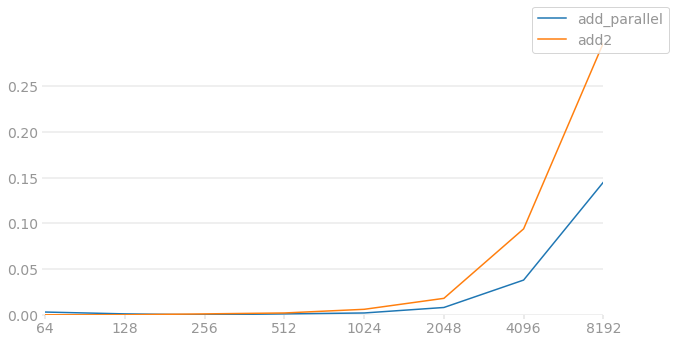

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot([scale for scale in range(6, 14)], times['add_parallel'], label='add_parallel')
ax.plot([scale for scale in range(6, 14)], times['add2'], label='add2')
ax.set_xticklabels(list(map(int, 2**ax.get_xticks())))
fig.legend()

In [64]:
add_parallel(a, b).dtype, (a + b).dtype

(dtype('float64'), dtype('float64'))

### GPU Versions

In [1]:
from numba import cuda, vectorize, float32
import numpy as np
import time

In [66]:
grid_size = (4_000, 4_000)
a = setup(grid_size)
b = setup(grid_size)
t0 = time.time()
_ = add_parallel(a, b)
t1 = time.time()
print(t1-t0)

0.026003122329711914


In [2]:
@vectorize(["float32(float32, float32)", "float64(float64, float64)"], target='cuda')
def add_gpu(a, b):
    return a+b

In [3]:
def setup(grid_size):
    return np.random.rand(np.prod(grid_size)).reshape(grid_size)

In [70]:
# Define Data
grid_size = (4_000, 4_000)
dtype = np.float64
# Create Data
a = setup(grid_size)
b = setup(grid_size)
c = np.zeros(grid_size)
# Define Time
times = {}
with cuda.gpus[0]:
    # Create Arrays
    t0 = time.time()
    x = cuda.device_array(grid_size, dtype=dtype)  # you explicitly should type these
    y = cuda.device_array(grid_size, dtype=dtype)  # you explicitly should type these
    result = cuda.device_array(grid_size, dtype=dtype)  # you explicitly should type these
    times['allocate memory'] = time.time() - t0
    # Copy data to GPU
    t0 = time.time()
    x.copy_to_device(a)  # you explicitly should type these
    y.copy_to_device(b)  # you explicitly should type these
    times['copy to device'] = time.time() - t0
    # Add on GPU
    t0 = time.time()
    result = add_gpu(x, y)
    times['compute'] = time.time() - t0
    # Copy data back
    t0 = time.time()
    x.copy_to_host(a)  # you explicitly should type these
    y.copy_to_host(b)  # you explicitly should type these
    result.copy_to_host(c)  # you explicitly should type these
    times['copy to host'] = time.time() - t0
    # cleanup
    t0 = time.time()
    del x, y, result  # you explicitly should type these
    times['delete'] = time.time() - t0
times

{'allocate memory': 0.03750443458557129,
 'copy to device': 0.11702513694763184,
 'compute': 0.009998559951782227,
 'copy to host': 0.20405077934265137,
 'delete': 0.011999368667602539}

In [4]:
# Define Data
dtype = np.float64
gpu_times = {}
for grid_size in [(2**i, 2**i) for i in np.arange(6, 15)]:
    # Create Data
    a = setup(grid_size)
    b = setup(grid_size)
    c = np.zeros(grid_size)
    # Define Time
    times_gpu = {}
    with cuda.gpus[0]:
        # Create Arrays
        t0 = time.time()
        x = cuda.device_array(grid_size, dtype=dtype)
        y = cuda.device_array(grid_size, dtype=dtype)
        result = cuda.device_array(grid_size, dtype=dtype)
        times_gpu['allocate memory'] = time.time() - t0
        # Copy data to GPU
        t0 = time.time()
        x.copy_to_device(a)
        y.copy_to_device(b)
        times_gpu['copy to device'] = time.time() - t0
        # Add on GPU
        t0 = time.time()
        result = add_gpu(x, y)
        times_gpu['compute'] = time.time() - t0
        # Copy data back
        t0 = time.time()
        x.copy_to_host(a)
        y.copy_to_host(b)
        result.copy_to_host(c)
        times_gpu['copy to host'] = time.time() - t0
        # cleanup
        t0 = time.time()
        del x, y, result
        times_gpu['delete'] = time.time() - t0
    del a, b, c
    gpu_times[grid_size] = times_gpu.copy()

CudaAPIError: [2] Call to cuMemAlloc results in CUDA_ERROR_OUT_OF_MEMORY

In [12]:
import pandas as pd

pd.DataFrame(gpu_times).T

,,allocate memory,copy to device,compute,copy to host,delete
64,64,0.001999,0.004001,0.456614,0.002011,0.000000
128,128,0.000992,0.002006,0.003995,0.002002,0.000000
256,256,0.001999,0.003999,0.004003,0.002998,0.002006
512,512,0.005981,0.005002,0.004998,0.006001,0.000000
1024,1024,0.005995,0.011006,0.003996,0.017007,0.000000
2048,2048,0.014001,0.040000,0.008002,0.071999,0.005997
4096,4096,0.032999,0.142006,0.014000,0.261999,0.030009


In [13]:
gpu_compute_times = [j['compute'] for j in gpu_times.values()]

In [14]:
import matplotlib.pyplot as plt

In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rgrei\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

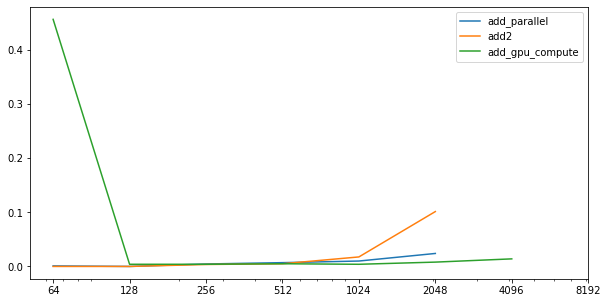

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot([2**scale for scale in range(6, 12)], times['add_parallel'], label='add_parallel')
ax.plot([2**scale for scale in range(6, 12)], times['add2'], label='add2')
ax.plot([2**scale for scale in range(6, 13)], gpu_compute_times, label='add_gpu_compute')
#ax.set_xticklabels(list(map(int, 2**ax.get_xticks())))
ax.set_xscale('log')
ax.set_xticks([2**scale for scale in range(6, 14)])
ax.set_xticklabels([2**scale for scale in range(6, 14)])
#ax.set_yscale('log')
ax.legend()

GPU version is slower due to copying of memory from RAM to GPU.

Let's look at CUDA compilation!

## CUDA Kernel

```bash
conda install cudatoolkit
```

In [22]:
print(cuda.gpus)

<Managed Device 0>


In [23]:
a = setup(grid_size)
b = setup(grid_size)
t0 = time.time()
_ = np.matmul(a, b)
t1 = time.time()
print(t1-t0)

0.009001731872558594


In [24]:
@cuda.jit
def matmul(A, B, C):
    """Perform square matrix multiplication of C = A * B"""
    i, j = cuda.grid(2)
    if i < C.shape[0] and j < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[i, k] * B[k, j]
        C[i, j] = tmp

In [27]:
# Define Data
grid_size = (4_000, 4_000)
dtype = np.float64
# Create Data
a = setup(grid_size)
b = setup(grid_size)
c = np.zeros(grid_size)
# Define external parameters
segment_size = np.prod(grid_size)
# Define Array
times = {}
#with cuda.gpus[0]:
if grid_size[0]:
    t0 = time.time()
    x = cuda.device_array(grid_size, dtype=dtype) #you explicitly should type these
    y = cuda.device_array(grid_size, dtype=dtype) #you explicitly should type these
    result = cuda.device_array(grid_size, dtype=dtype) #you explicitly should type these
    times['allocate memory'] = time.time() - t0
    try:
        t0 = time.time()
        x.copy_to_device(a)
        y.copy_to_device(b)
        times['copy to device'] = time.time() - t0
        t0 = time.time()
        matmul[32, 32](x, y, result)
        times['compute'] = time.time() - t0
        t0 = time.time()
        x.copy_to_host(a)
        y.copy_to_host(b)
        result.copy_to_host(c)
        times['copy to host'] = time.time() - t0
    except Exception as e:
        print(e)
    finally:
        t0 = time.time()
        del x, y, result
        times['delete'] = time.time() - t0
times

{'allocate memory': 0.02900862693786621,
 'copy to device': 0.12103891372680664,
 'compute': 0.000997781753540039,
 'copy to host': 0.22000551223754883,
 'delete': 0.011996030807495117}

In [ ]:
# Define Data
grid_size = (8_000, 8_000)
dtype = np.float64
# Create Data
a = setup(grid_size)
b = setup(grid_size)
c = np.zeros(grid_size)
# Define external parameters
segment_size = np.prod(grid_size)
# Define Array
times = {}
#with cuda.gpus[0]:
if grid_size[0]:
    t0 = time.time()
    x = cuda.device_array(grid_size, dtype=dtype) #you explicitly should type these
    y = cuda.device_array(grid_size, dtype=dtype) #you explicitly should type these
    result = cuda.device_array(grid_size, dtype=dtype) #you explicitly should type these
    times['allocate memory'] = time.time() - t0
    try:
        t0 = time.time()
        x.copy_to_device(a)
        y.copy_to_device(b)
        times['copy to device'] = time.time() - t0
        t0 = time.time()
        matmul[1, 1](x, y, result)
        times['compute'] = time.time() - t0
        t0 = time.time()
        x.copy_to_host(a)
        y.copy_to_host(b)
        result.copy_to_host(c)
        times['copy to host'] = time.time() - t0
    except Exception as e:
        print(e)
    finally:
        t0 = time.time()
        del x, y, result
        times['delete'] = time.time() - t0
times

In [28]:
# Controls threads per block and shared memory usage.
# The computation will be done on blocks of TPBxTPB elements.
TPB = 16

@cuda.jit
def fast_matmul(A, B, C):
    """
    Perform matrix multiplication of C = A * B
    Each thread computes one element of the result matrix C
    """

    # Define an array in the shared memory
    # The size and type of the arrays must be known at compile time
    sA = cuda.shared.array(shape=(TPB, TPB), dtype=float32)
    sB = cuda.shared.array(shape=(TPB, TPB), dtype=float32)

    x, y = cuda.grid(2)
    
    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    
    if x >= C.shape[0] and y >= C.shape[1]:
        # Quit if (x, y) is outside of valid C boundary
        return

    # Each thread computes one element in the result matrix.
    # The dot product is chunked into dot products of TPB-long vectors.
    tmp = 0.
    for i in range(int(A.shape[1] / TPB)):
        # Preload data into shared memory
        sA[tx, ty] = A[x, ty + i * TPB]
        sB[tx, ty] = B[tx + i * TPB, y]

        # Wait until all threads finish preloading
        cuda.syncthreads()

        # Computes partial product on the shared memory
        for j in range(TPB):
            tmp += sA[tx, j] * sB[j, ty]

        # Wait until all threads finish computing
        cuda.syncthreads()

    C[x, y] = tmp

# Dask

- open  source  library  for  distributed  computing  in  Python
- natively scale from a single computer to a cluster with little to no code alterations
- provides  real-time  responsive  dashboards  for  progress  of  computations  using  Bokeh

Dask data structures:
- definee collections analogous to: arrays,  bags,  dataframes
- get operated  on  in  the  task-graph
- distributed  by  either  the: Single  MachineScheduler  (SMS) or  the Distributed  Scheduler  (DS)

Single Machine Scheduler (SMS)
- threaded  scheduler  execution  via `multiprocessing.pool.ThreadPool`
- lightweight framework with overhead $\sim 50 \mu s$ per task
- requires no setup
- incurs no data transfer delays
- all computation occurs within  the  same  process  on  multiple  threads
- due  to  the  Python Global  Interpreter Lock  (GIL),  parallelism  in  the  threaded  scheduler  can  only  occur  through  non-Python code  executions  (e.g.   through  NumPy,  Pandas,  Numba, etc.)

Distributed Scheduler (DS)
- If  Python objects dominate computations,  a process-based scheduler should be used, here the distributed scheduler 
- Internally, the distributed scheduler determines the execution of the task graph with respect to locality in a more efficient way than traditional multiprocessing

## Local Parallel Clusters

### Multi-Processing

In [10]:
from multiprocessing import Pool

In [4]:
chunks = [d1[i:i*len(d1)//5].copy() for i in range(5)]

In [ ]:
%%time
with Pool(5) as p:
    _ = p.map(expensive_vec, chunks)

### Dask Distributed

In [6]:
from dask.distributed import Client

In [12]:
n_processes = 2
client = Client(processes=n_processes,
                threads_per_worker=2,
                n_workers=n_processes,
                memory_limit='{}GB'.format(int(n_processes*2)))

In [8]:
%%time
futures = client.map(expensive_vec, chunks)
bootstrap_results = np.array([fut.result() for fut in futures])

C:\Users\rgrei\Anaconda3\envs\py38\lib\site-packages\distributed\worker.py:3373: UserWarning: Large object of size 1.80 MB detected in task graph: 
  ([248797.93748180202, 647650.4325437869, 291136.24 ... .23489052575],)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  warnings.warn(


Wall time: 47.1 s


<timed exec>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [17]:
%%time
big_futures = client.scatter(chunks)
futures = client.submit(expensive_vec, big_futures)
%time bootstrap_results = np.array([fut.result() for fut in big_futures])

Wall time: 1.36 s
Wall time: 15.1 s


<timed exec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [18]:
client.cancel(futures)
client.close()

In [ ]:
#with parallel_backend('dask'):
def proc(i):
    # Your normal scikit-learn code here
    from astroML.correlation import two_point_angular
    if i > 0:
        sample = np.sort(np.random.randint(0, len(x_dat), len(x_dat)))
    else:
        sample = range(len(x_dat))
    x_sample = x_dat[sample]
    y_sample = y_dat[sample]
    bins = 10 ** np.linspace(np.log10(1/50000.), np.log10(0.5), 300)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    res = two_point_angular(x_sample, y_sample, bins=bins, method='landy-szalay')
    return res

In [ ]:
futures = client.map(proc, range(n_bootstraps))

In [ ]:
bootstrap_results = np.array([fut.result() for fut in futures])

In [ ]:
client.cancel(futures)
client.close()

## Combining with Numba